In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [68]:
df = pd.read_csv("../Data/Train_TEC_mar17.csv")

In [69]:
df.describe()

,Date,Month,Year,Time,LT,TEC
count,14400.000000,14400.0,14400.0,14400.000000,14400.000000,14400.000000
mean,10.500000,3.0,2017.0,11.999714,17.294738,17.016025
std,5.766482,0.0,0.0,6.928431,6.928072,10.732619
min,1.000000,3.0,2017.0,0.016389,5.310988,0.285998
25%,5.750000,3.0,2017.0,6.008056,11.303727,7.154763
50%,10.500000,3.0,2017.0,11.999583,17.294961,16.224494
75%,15.250000,3.0,2017.0,17.991319,23.285830,27.533690
max,20.000000,3.0,2017.0,23.983056,29.278233,42.039814


In [70]:
df.drop(["Date","Month","Year","Time","LT"], axis=1, inplace=True)

In [71]:
df.describe()

,TEC
count,14400.000000
mean,17.016025
std,10.732619
min,0.285998
25%,7.154763
50%,16.224494
75%,27.533690
max,42.039814


In [83]:
train, test = df.iloc[0:-1440], df.iloc[-1440:]
print(len(train), len(test))

12960 1440


In [84]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [85]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train, time_steps)
X_test, y_test = create_dataset(test, test, time_steps)

print(X_train.shape, y_train.shape)

(12950, 10, 1) (12950, 1)


In [86]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [87]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 11655 samples, validate on 1295 samples
Epoch 1/30
11655/11655 [==============================] - 9s 802us/sample - loss: 57.4190 - val_loss: 1.9514
Epoch 2/30
11655/11655 [==============================] - 7s 577us/sample - loss: 2.9939 - val_loss: 0.8894
Epoch 3/30
11655/11655 [==============================] - 7s 572us/sample - loss: 2.1605 - val_loss: 0.7639
Epoch 4/30
11655/11655 [==============================] - 7s 588us/sample - loss: 1.6015 - val_loss: 0.6942
Epoch 5/30
11655/11655 [==============================] - 7s 570us/sample - loss: 1.5027 - val_loss: 0.3714
Epoch 6/30
11655/11655 [==============================] - 7s 588us/sample - loss: 3.8880 - val_loss: 0.3017
Epoch 7/30
11655/11655 [==============================] - 8s 657us/sample - loss: 0.8737 - val_loss: 0.8120
Epoch 8/30
11655/11655 [==============================] - 8s 645us/sample - loss: 1.6346 - val_loss: 0.3087
Epoch 9/30
11655/11655 [==============================] - 7s 641us/sample - loss: 0.71

In [88]:
y_pred = model.predict(X_test)

In [89]:
y_pred

array([[3.2655847],
       [3.9463952],
       [4.214821 ],
       ...,
       [1.7403672],
       [1.4073113],
       [1.3842129]], dtype=float32)

In [91]:
y_original = df[-1430:]

In [92]:
y_original = y_original.values

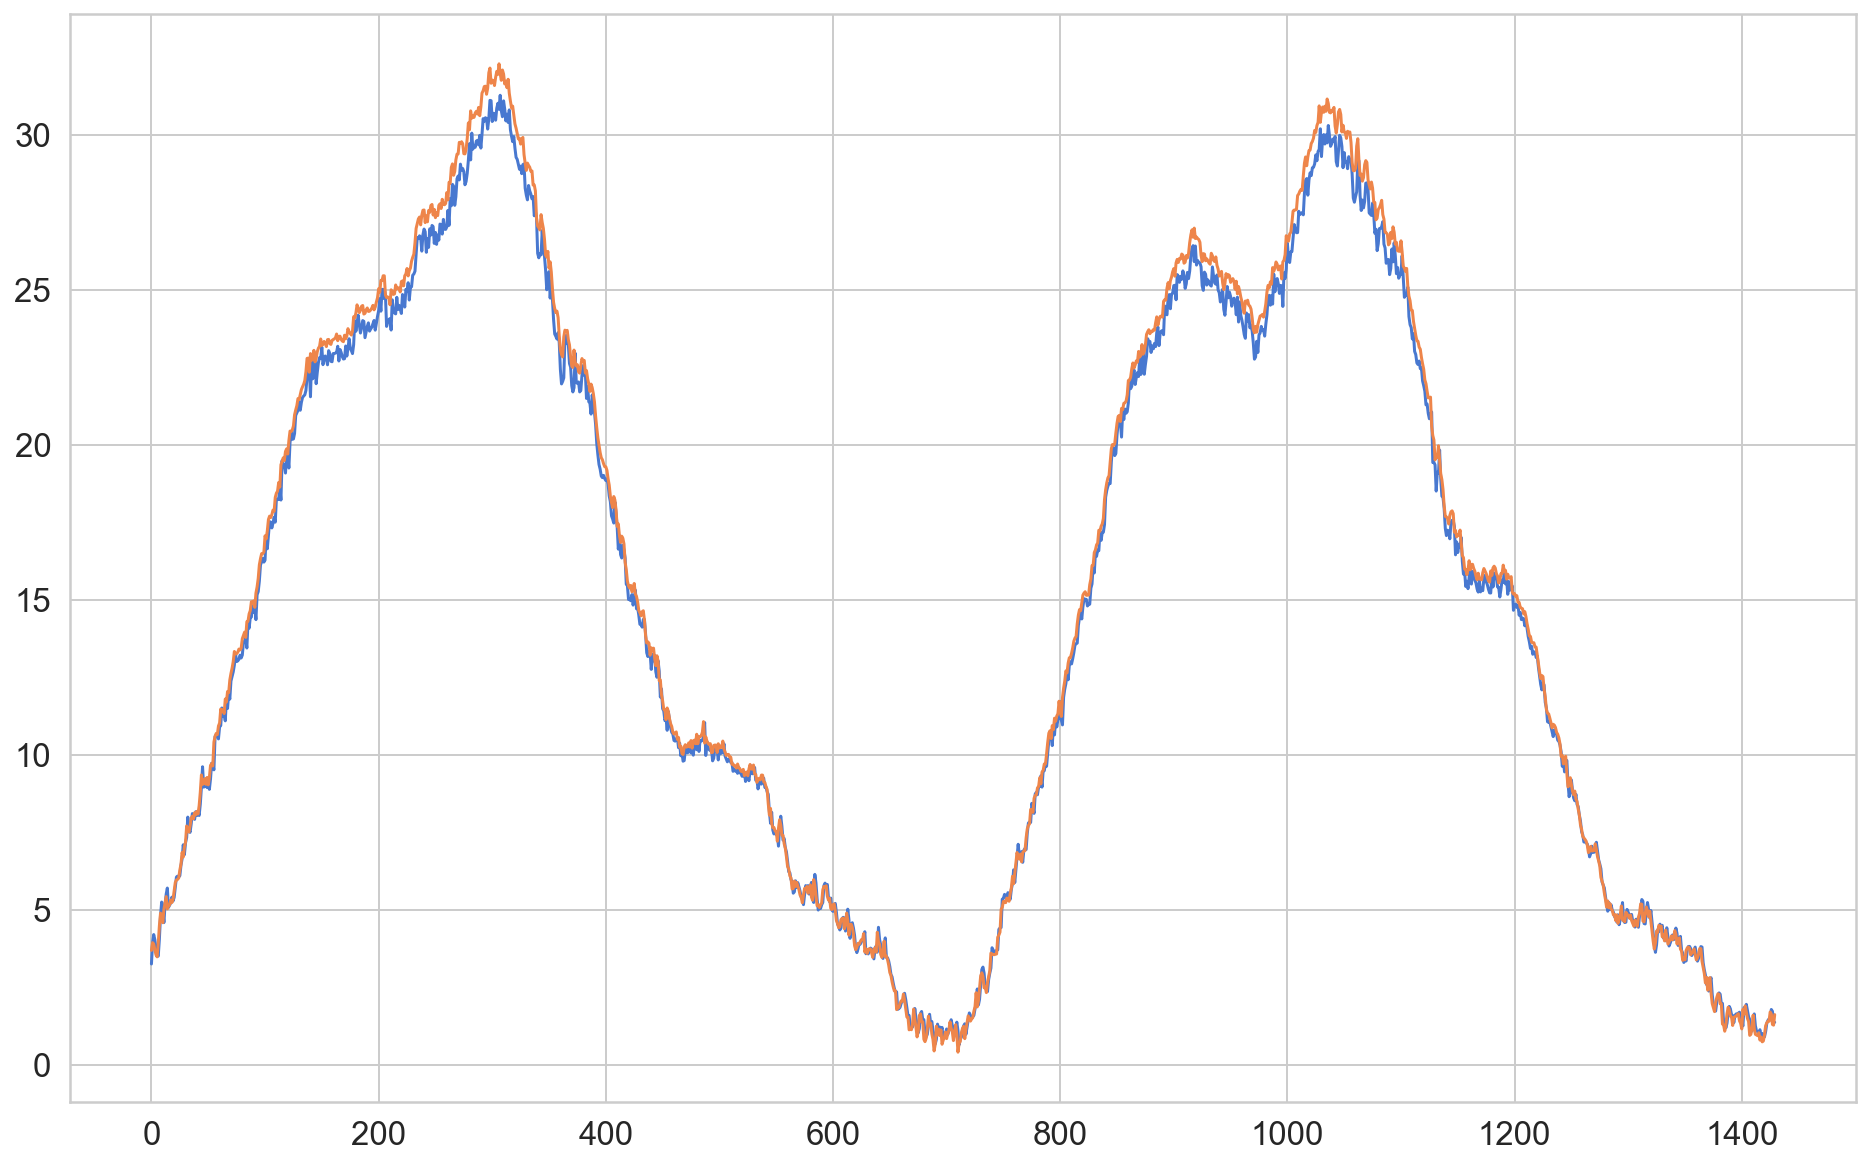

In [96]:
plt.plot(y_pred)
plt.plot(y_original)